Portions : <br>
1) Image Processing using OpenCV<br>
2) Image operations (convolution, max pooling etc.,)<br>
3) CNN

**<h1>Image Processing using OpenCV**

**Image Preprocessing** Explore resizing, gray scaling, noise reduction(smoothing,learning and filtering techniques), normalisation, binarisation, contrast enhancement, image standardisation, data augumentation, color correction, segmentation, feature extraction

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, filters, feature, color

Loading and displaying image

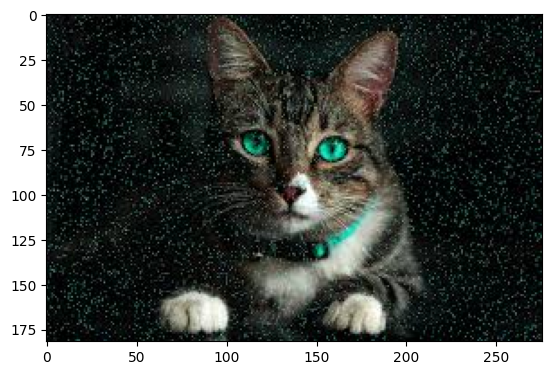

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DLL/Current/images.jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

Resizing

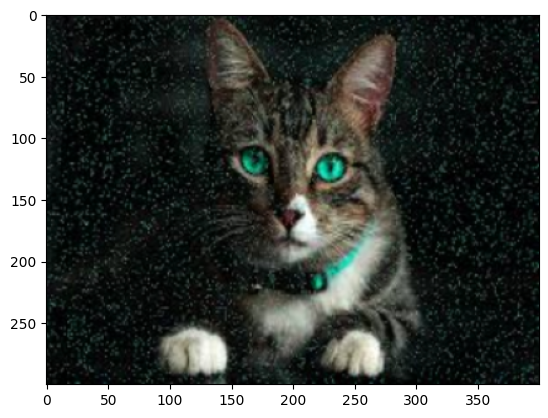

In [ ]:
image = cv2.resize(image,(400,300))   #Image is considered as matrix.So x increases down and y increases right but here we swap and give coordinates i.e according to coordinate axis.
plt.imshow(image)

Gray scaling

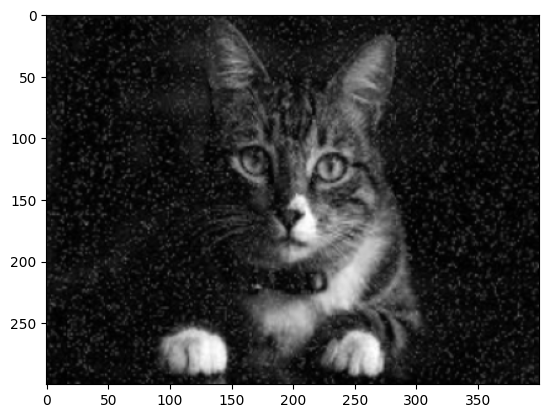

In [ ]:
grey_img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(grey_img,cmap='gray')

Noise reduction(smoothing,sharpening,filtering)

Smoothing(blurring)

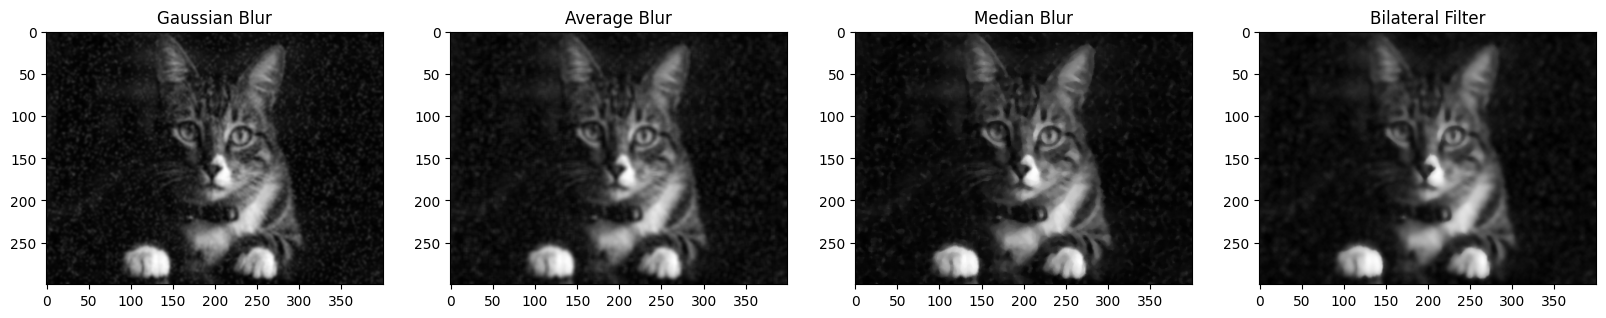

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(grey_img, (5, 5), 0)
axes[0].imshow(gaussian_blur, cmap='gray')
axes[0].set_title("Gaussian Blur")

# Average Blur
average_blur = cv2.blur(grey_img, (5, 5))
axes[1].imshow(average_blur, cmap='gray')
axes[1].set_title("Average Blur")

# Median Blur
median_blur = cv2.medianBlur(grey_img, 5)
axes[2].imshow(median_blur, cmap='gray')
axes[2].set_title("Median Blur")

# Bilateral Filter
bilateral_blur = cv2.bilateralFilter(grey_img, 9, 75, 75)
axes[3].imshow(bilateral_blur, cmap='gray')
axes[3].set_title("Bilateral Filter")

plt.show()

Sharpening

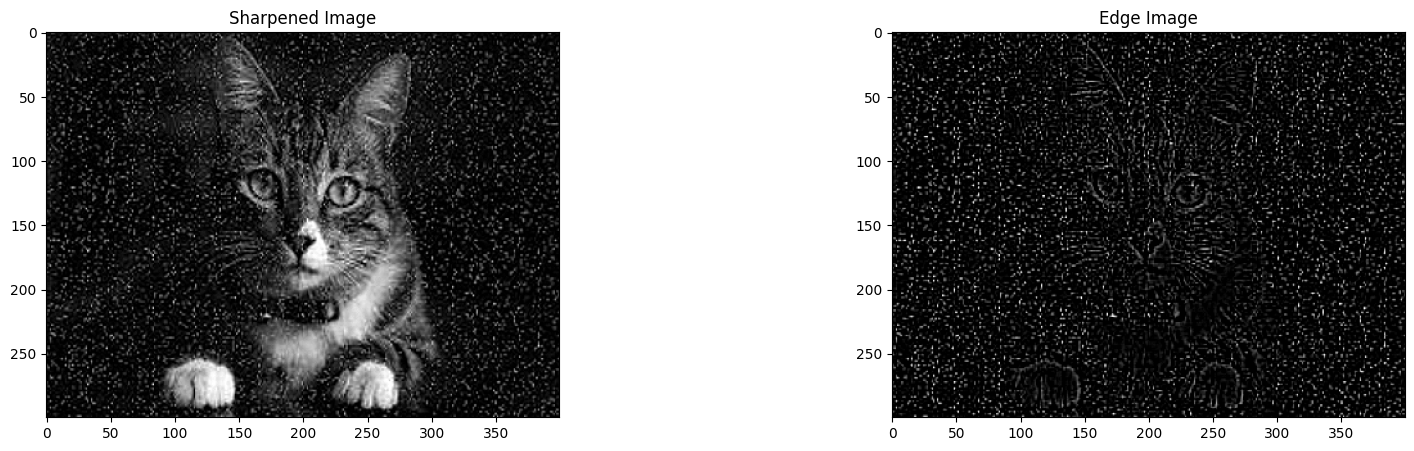

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (20,5))

sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(grey_img, -1, sharpening_kernel)
axes[0].imshow(sharpened, cmap='gray')
axes[0].set_title("Sharpened Image")

laplacian_edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge = cv2.filter2D(grey_img, -1, laplacian_edge_kernel)
axes[1].imshow(edge, cmap='gray')
axes[1].set_title("Edge Image")
plt.show()

Filtering

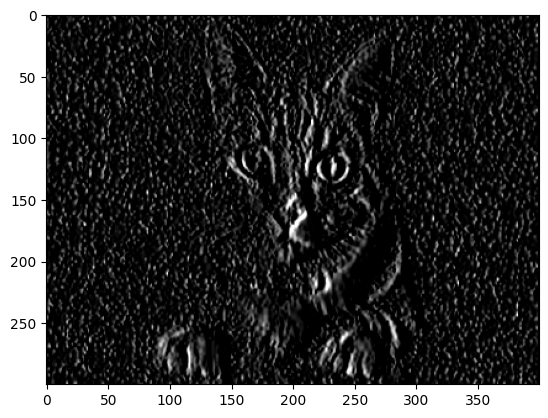

In [ ]:
sobel_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtered_image = cv2.filter2D(grey_img, -1, sobel_filter)
plt.imshow(filtered_image, cmap='gray')

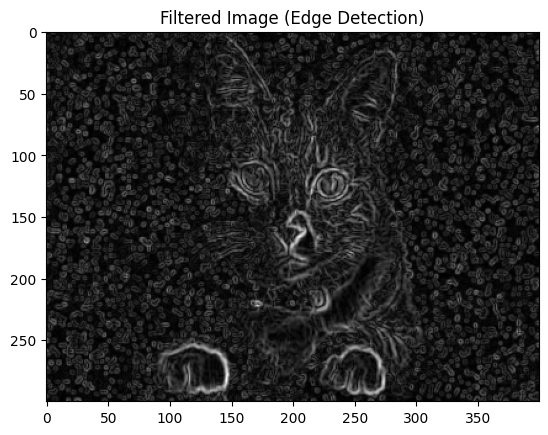

In [ ]:
filtered = filters.sobel(grey_img)
plt.imshow(filtered, cmap='gray')
plt.title("Filtered Image (Edge Detection)")
plt.show()

Normalisation

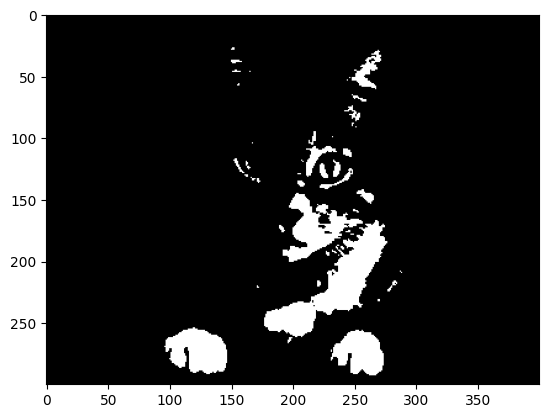

In [ ]:
image_normal = cv2.normalize(grey_img,None,0,1,cv2.NORM_MINMAX)
plt.imshow(image_normal,cmap='grey')

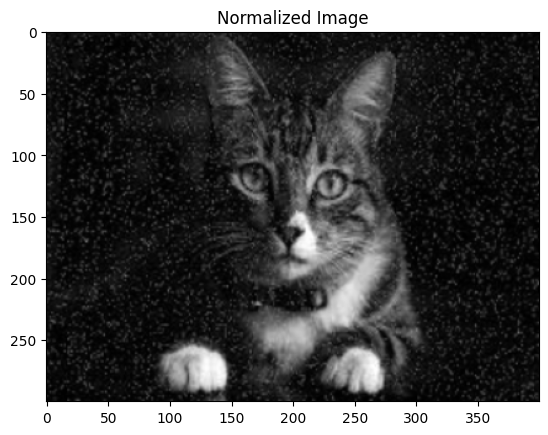

In [ ]:
normalized = grey_img / 255.0
plt.imshow(normalized, cmap='gray')
plt.title("Normalized Image")
plt.show()

Binarisation and thresholding

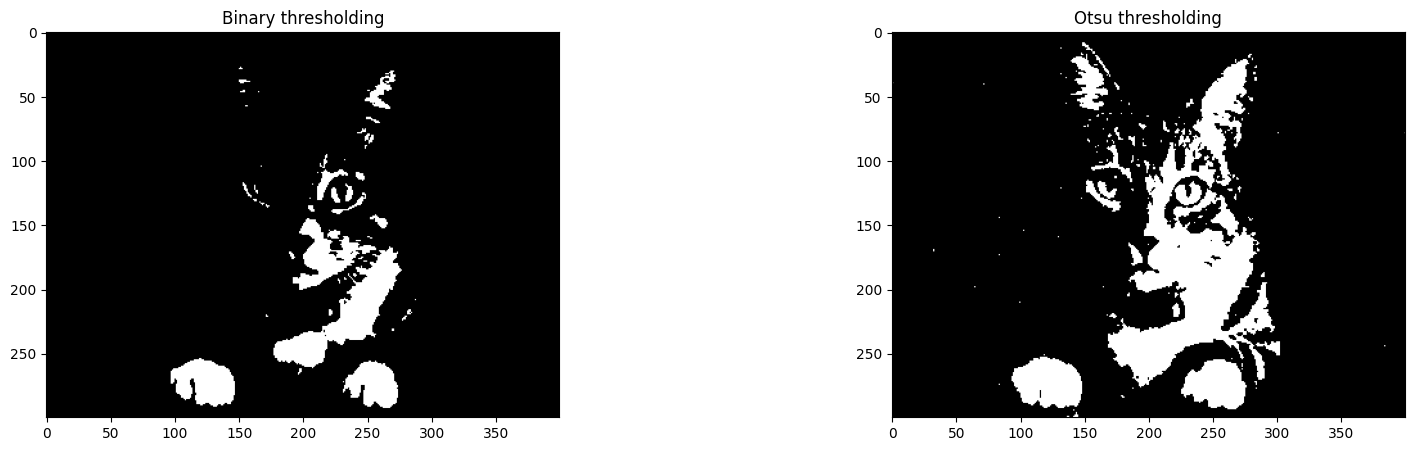

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (20,5))

_,thresh1 = cv2.threshold(grey_img,128,255,cv2.THRESH_BINARY)
axes[0].imshow(thresh1,cmap='grey')
axes[0].set_title("Binary thresholding")

thresh2,image_otsu = cv2.threshold(grey_img,128,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
axes[1].imshow(image_otsu,cmap='grey')
axes[1].set_title("Otsu thresholding")
plt.show()

Contrast enhancement

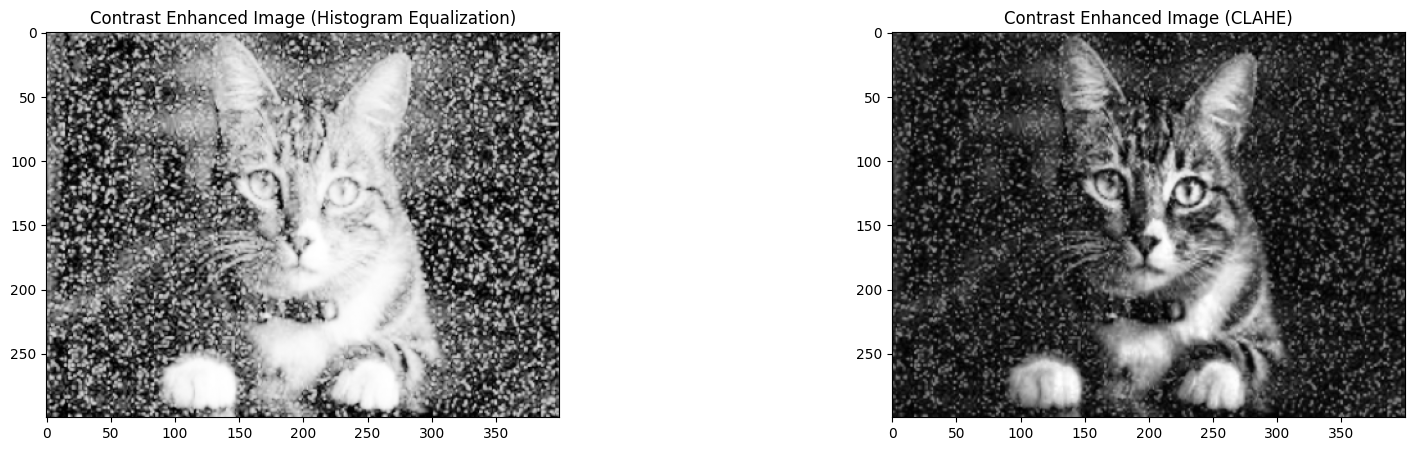

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
# Histogram Equalization using OpenCV
equalized = cv2.equalizeHist(grey_img)
axes[0].imshow(equalized, cmap='gray')
axes[0].set_title("Contrast Enhanced Image (Histogram Equalization)")

# Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_equalized = clahe.apply(grey_img)
axes[1].imshow(clahe_equalized, cmap='gray')
axes[1].set_title("Contrast Enhanced Image (CLAHE)")
plt.show()


Image standardisation

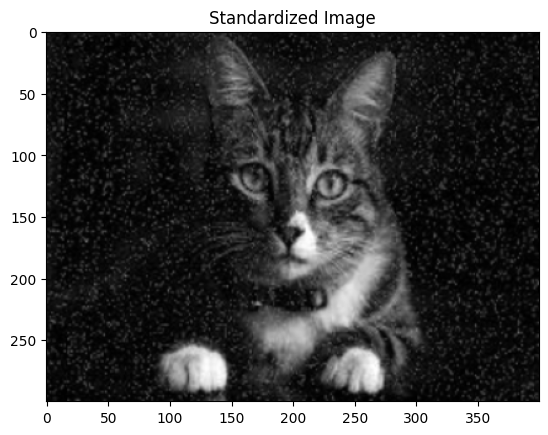

In [ ]:
standardized = (grey_img - np.mean(grey_img)) / np.std(grey_img)
plt.imshow(standardized, cmap='gray')
plt.title("Standardized Image")
plt.show()

Data augmentation

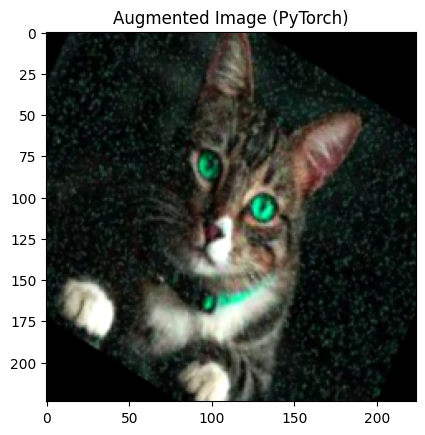

In [ ]:
import torchvision.transforms as transforms
import torch
from PIL import Image

# Convert OpenCV image to PIL format
pil_image = Image.fromarray(image)

# Define data augmentation transformations
transform = transforms.Compose([
    transforms.RandomRotation(30),  # Random rotation within ±30 degrees
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random crop with scaling
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust color properties
    transforms.ToTensor()  # Convert image to tensor format
])

# Apply transformation
augmented_tensor = transform(pil_image)

# Convert tensor back to NumPy image for visualization
augmented_image = augmented_tensor.permute(1, 2, 0).numpy()  # Rearrange dimensions
plt.imshow(augmented_image)
plt.title("Augmented Image (PyTorch)")
plt.show()


Colour correction

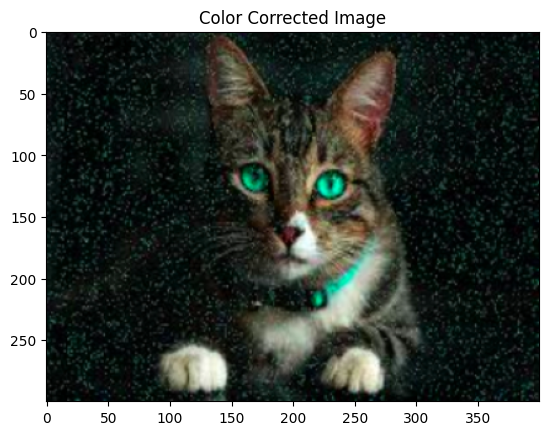

In [ ]:
from PIL import Image, ImageEnhance

pil_image = Image.fromarray(image)
enhancer = ImageEnhance.Color(pil_image)
corrected = np.array(enhancer.enhance(1.5))
plt.imshow(corrected)
plt.title("Color Corrected Image")
plt.show()

Segmentation

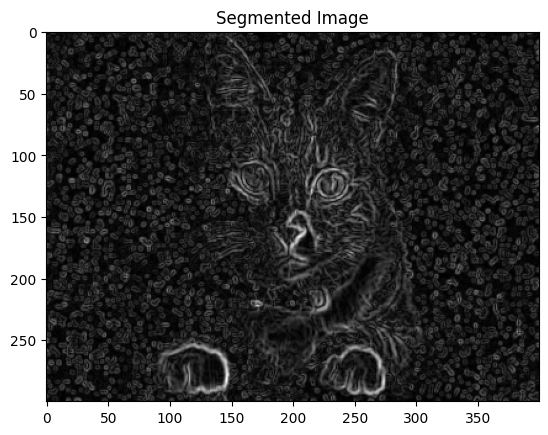

In [ ]:
segmented = filters.sobel(grey_img)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Image")
plt.show()

Feature extraction

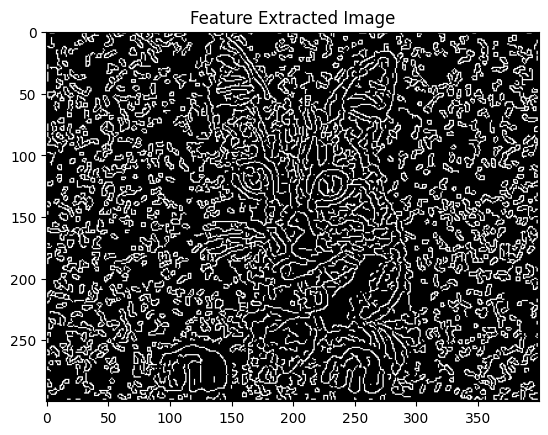

In [ ]:
features = feature.canny(grey_img)
plt.imshow(features, cmap='gray')
plt.title("Feature Extracted Image")
plt.show()

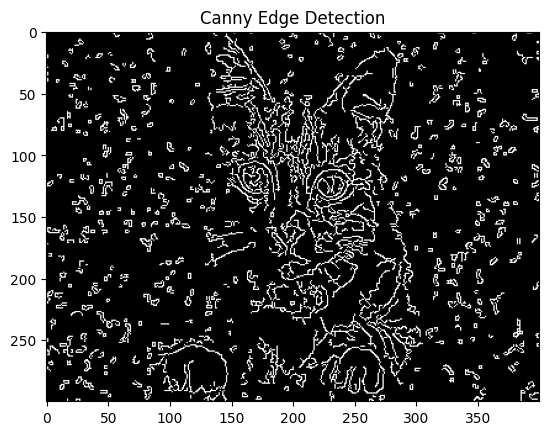

In [ ]:
canny_edges = cv2.Canny(grey_img,100,200)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

**<h1>Image operations**

In [ ]:
padding = 2
stride = 2
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
image = np.array([[2,4,3,7,2],[6,1,4,3,1],[7,2,3,5,5],[1,7,3,9,1],[4,2,9,1,5]])

Convolution

In [ ]:
out_size_row = (image.shape[0] - kernel.shape[0] + 2*padding)//stride + 1
out_size_col = (image.shape[1] - kernel.shape[1] + 2*padding)//stride + 1
out_size = (out_size_row,out_size_col)
conv = np.zeros(out_size)

In [ ]:
image_padded = np.pad(image,padding)
image_padded

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 4, 3, 7, 2, 0, 0],
       [0, 0, 6, 1, 4, 3, 1, 0, 0],
       [0, 0, 7, 2, 3, 5, 5, 0, 0],
       [0, 0, 1, 7, 3, 9, 1, 0, 0],
       [0, 0, 4, 2, 9, 1, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
col,row = 0,0
for i in range(out_size_row):
  col = 0
  if row + kernel.shape[0] -1 > image_padded.shape[0]:
    break
  for j in range(out_size_col):
    if col + kernel.shape[1] -1 > image_padded.shape[1]:
      row += stride
      break
    else:
      conv[i,j] = np.sum(image_padded[row:row+kernel.shape[0],col:col+kernel.shape[1]]*kernel)
      col += stride
  row += stride

In [ ]:
conv

array([[ -2.,  -1.,   1.,   2.],
       [-15.,   5.,   2.,   8.],
       [-12.,  -3.,   4.,  11.],
       [ -4.,  -5.,   4.,   5.]])

Max pooling

In [ ]:
filter_row = 2
filter_col = 2
stride = 2

In [ ]:
out_size_row = (conv.shape[0] - filter_row)//stride + 1
out_size_col = (conv.shape[1] - filter_col)//stride + 1
out_size = (out_size_row,out_size_col)

In [ ]:
max_pool = np.zeros(out_size)

In [ ]:
row,col = 0,0
for i in range(out_size_row):
  col = 0
  if row + filter_row -1 > conv.shape[0]:
    break
  for j in range(out_size_col):
    if col + filter_col -1 > conv.shape[1]:
      row += stride
      break
    else:
      max_pool[i,j] = np.max(conv[row:row+filter_row,col:col+filter_col])
      col += stride
  row += stride

In [ ]:
max_pool

array([[ 5.,  8.],
       [-3., 11.]])

Flatenning

In [ ]:
flat = []

In [ ]:
for i in range(max_pool.shape[0]):
  for j in range(max_pool.shape[1]):
    flat.append(max_pool[i,j])

In [ ]:
flat

[5.0, 8.0, -3.0, 11.0]

**<h1>CNN**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

Loading Data and applying transformation at the same time

In [ ]:
transform = transforms.Compose([
    #transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
dataset = datasets.ImageFolder(root="CNN letter Dataset", transform=transform)